In [44]:
import numpy as np
from sklearn import datasets
import  matplotlib.pyplot as plt
dataset = datasets.fetch_olivetti_faces()

<Figure size 640x480 with 0 Axes>

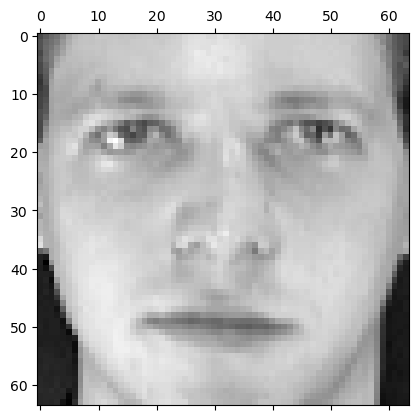

In [45]:
first_face = dataset.data[0].reshape(64,64)
plt.gray()
plt.matshow(first_face)

In [52]:
X_data = dataset.data

print(f'it means we hav {X_data.shape[0]} examples and {X_data.shape[1]} features')
print(f'So cov matrix should be of {X_data.shape[1]} ^ 2')

it means we hav 400 examples and 4096 features
So cov matrix should be of 4096 ^ 2


In [61]:
# first we need to normalize the matrix
Xm = np.mean(X_data,axis=0)
Xs = np.std(X_data,axis=0)
Xv = np.var(X_data,axis=0)
print("The mean is",Xm)
print("The standard deviation is",Xs)
print("The variance is",Xv)

Xn = (X_data - Xm) / Xs

cov = np.cov(Xn.T)
cov.shape

The mean is [0.40013435 0.43423545 0.4762809  ... 0.32141536 0.3136469  0.31045464]
The standard deviation is [0.18046872 0.18926673 0.19449872 ... 0.18760698 0.18338676 0.1804086 ]
The variance is [0.03256896 0.03582189 0.03782975 ... 0.03519638 0.0336307  0.03254726]


(4096, 4096)

In [63]:
# now we need to find eigne values and eigen vectors of this cov matrix
eig_values, eig_vectors = np.linalg.eig(cov)
print(f'Eigne values are {eig_values}')
print(f'Eigne vectors are {eig_vectors}')



Eigne values are [ 1.10361838e+03+0.00000000e+00j  5.06810771e+02+0.00000000e+00j
  3.21988946e+02+0.00000000e+00j ...  3.45190928e-16-7.94004154e-17j
 -4.26872367e-16+0.00000000e+00j  2.72423611e-17+0.00000000e+00j]
Eigne vectors are [[ 3.32091335e-03+0.00000000e+00j  2.20901911e-02+0.00000000e+00j
   9.66163617e-04+0.00000000e+00j ...  2.95743914e-04+1.58884658e-04j
   1.07452920e-03+0.00000000e+00j -3.42780363e-04+0.00000000e+00j]
 [ 5.16380065e-03+0.00000000e+00j  2.41923109e-02+0.00000000e+00j
  -8.03866153e-04+0.00000000e+00j ... -3.54043904e-05+9.24742496e-05j
  -3.61122836e-05+0.00000000e+00j  4.71775010e-09+0.00000000e+00j]
 [ 6.62312169e-03+0.00000000e+00j  2.67989338e-02+0.00000000e+00j
  -8.76282830e-04+0.00000000e+00j ...  1.19359724e-04-8.83815790e-05j
   1.21469663e-04+0.00000000e+00j -1.21566587e-04+0.00000000e+00j]
 ...
 [-1.36456916e-03+0.00000000e+00j -2.24164675e-02+0.00000000e+00j
  -8.44198268e-03+0.00000000e+00j ...  7.27801334e-03+5.84171352e-03j
   6.76564824e-

In [64]:
pc = eig_vectors

#finding varicance aloong each column
cvar =  np.var(np.dot(Xn,pc),axis=0)

# sorting variance columns max variance will be on index 0
idx = np.argsort(-cvar)
# sorting cvar matrix with largest cov at start
cvar = cvar[idx]

# sortin pc array so that eigen vector with max variance will be at column 0
pc = pc[:,idx]

print("The eigen vectors (principal components) are \n",pc)
print("The variance captured along each PC:",cvar)
print("The fraction of variance captured along each PC: ",np.cumsum(cvar)/np.sum(cvar))

The eigen vectors (principal components) are 
 [[ 3.32091335e-03+0.00000000e+00j  2.20901911e-02+0.00000000e+00j
   9.66163617e-04+0.00000000e+00j ...  5.13694301e-04+9.79093587e-06j
  -3.35817316e-04-3.37815169e-04j -3.35817316e-04+3.37815169e-04j]
 [ 5.16380065e-03+0.00000000e+00j  2.41923109e-02+0.00000000e+00j
  -8.03866153e-04+0.00000000e+00j ...  2.39049378e-05+4.38254272e-07j
  -7.29937191e-05+4.28741167e-05j -7.29937191e-05-4.28741167e-05j]
 [ 6.62312169e-03+0.00000000e+00j  2.67989338e-02+0.00000000e+00j
  -8.76282830e-04+0.00000000e+00j ...  3.93230044e-05+5.30784724e-05j
  -7.77389628e-05-3.23817438e-05j -7.77389628e-05+3.23817438e-05j]
 ...
 [-1.36456916e-03+0.00000000e+00j -2.24164675e-02+0.00000000e+00j
  -8.44198268e-03+0.00000000e+00j ... -8.21116891e-03+3.48483879e-03j
   8.72634974e-03-3.99297924e-04j  8.72634974e-03+3.99297924e-04j]
 [-3.55313142e-03+0.00000000e+00j -2.09123714e-02+0.00000000e+00j
  -7.16254604e-03+0.00000000e+00j ... -1.25876132e-02-4.36656792e-03j


In [73]:
variance_captured = np.cumsum(cvar)/np.sum(cvar)
variance_captured[100]
# it means it is the percentage of variance we captured in first hundered Eigne vectors

0.9363916255583746

In [76]:
k = 100
W = pc[:,0:k] #selecting upto dr principal components only
Z = np.dot(Xn,W)
print("idx is", idx.shape)
print("Data after transformation\n",Z)
print("Standard deviation after transformation",np.std(Z,axis=0))
print("Variance after transformation",np.var(Z,axis=0))
print("Fraction of variance captured along the projections: ",np.var(Z,axis=0)/np.sum(np.var(Xn,axis=0)))

idx is (4096,)
Data after transformation
 [[ 45.26837974+0.j   2.17394644+0.j -21.81839729+0.j ...  -1.6772157 +0.j
    3.44096903+0.j   0.92413365+0.j]
 [ 11.86003686+0.j  41.95491045+0.j   3.10510875+0.j ...  -1.25463451+0.j
   -0.96622027+0.j   1.96832257+0.j]
 [ 39.27399127+0.j   7.27784437+0.j -11.94020124+0.j ...  -0.37943699+0.j
    3.94507808+0.j   0.47291328+0.j]
 ...
 [-10.81211064+0.j   9.58496726+0.j  24.19494596+0.j ...  -0.46468439+0.j
   -1.30510173+0.j   3.11465745+0.j]
 [ 36.93931703+0.j -56.96338996+0.j  -5.20919631+0.j ...  -0.13550698+0.j
    2.58738604+0.j   0.07955185+0.j]
 [  8.68293627+0.j -15.29022361+0.j   9.25133724+0.j ...   1.12977249+0.j
   -3.27722159+0.j  -1.29323218+0.j]]
Standard deviation after transformation [33.17920028 22.48429994 17.92160634 13.85802066 11.53104311 11.26977228
  9.88138795  9.21182559  8.72341921  8.21149671  7.92709502  7.44627683
  7.10821772  6.84507078  6.69518274  6.264771    5.95906976  5.70070466
  5.57685427  5.42762772  5

In [79]:
# Now find inversse of PCA

iW = W.T
Xr = np.dot(Z,iW)

W.shape

(4096, 100)

/var/folders/n2/wd0grqzs6xg33_kyn5kgv96w0000gn/T/ipykernel_2351/651152173.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  first_face = Xr[0].reshape(64,64).astype(np.float64)


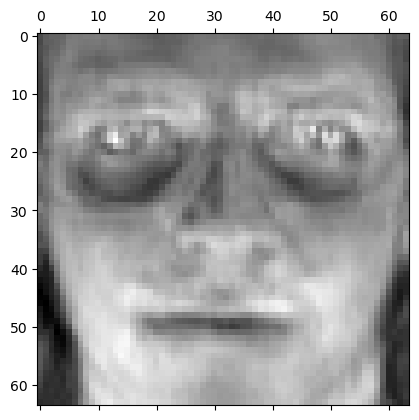

In [84]:
first_face = Xr[0].reshape(64,64).astype(np.float64)

plt.matshow(first_face)

In [88]:
Z.shape

(400, 100)

<b>Now we can see that we have captured about 93% of face info in just 100 features from total 4096 features<b>